<a href="https://colab.research.google.com/github/Nithyasri-Babu/customer-segmentation/blob/main/visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('/content/modified_supermarket_data.csv')


In [ ]:
# Step 3: Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

In [ ]:
# Step 4: Extract Month
df['Month'] = df['Date'].dt.to_period('M')

In [ ]:
# Step 5: Calculate Monthly Profit/Loss
monthly_df = df.groupby('Month').agg({
    'Total': 'sum',
    'gross income': 'sum'
}).reset_index()

monthly_df['Cost'] = monthly_df['Total'] - monthly_df['gross income']
monthly_df['Profit/Loss'] = monthly_df['gross income']

/tmp/ipython-input-7-3400363738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Profit/Loss', data=monthly_df, palette='Blues_d')


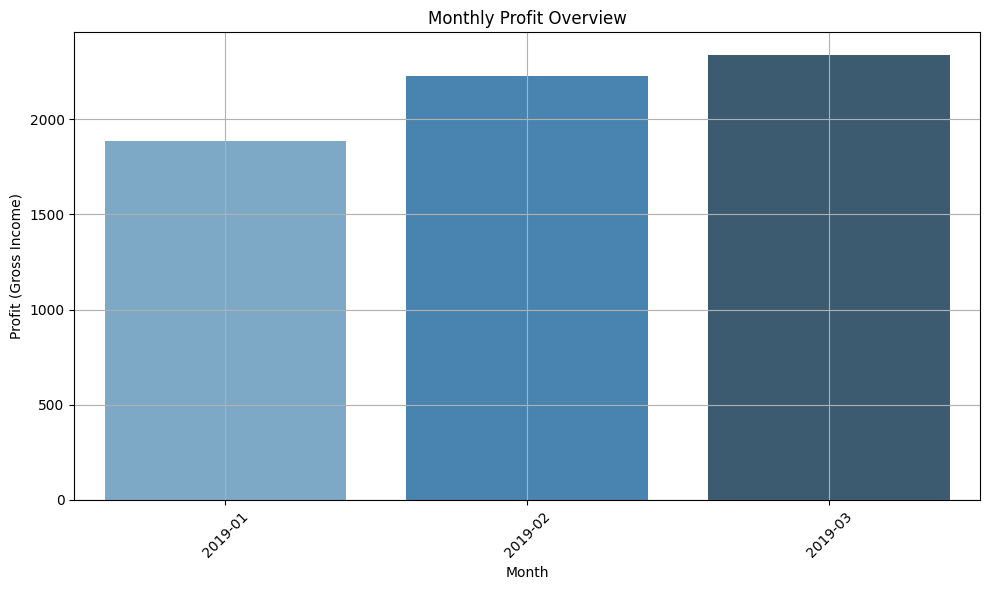

In [ ]:
# Step 6: Plot Monthly Profit/Loss
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Profit/Loss', data=monthly_df, palette='Blues_d')
plt.title("Monthly Profit Overview")
plt.ylabel("Profit (Gross Income)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-3951785168.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product line', data=product_sales, palette='viridis')


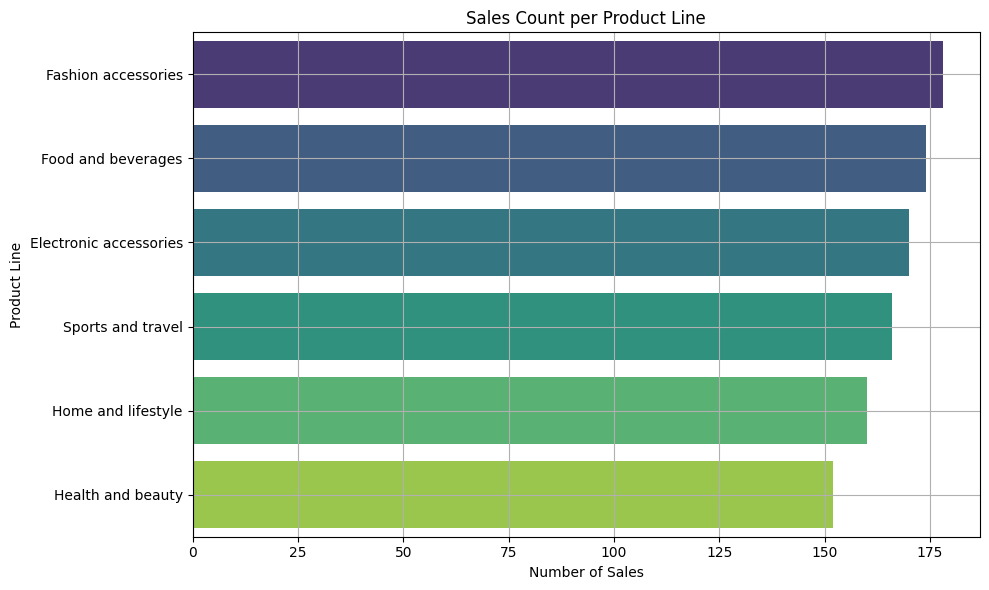

In [ ]:
# Step 7: Product Sales Count (most/least sold)
product_sales = df['Product line'].value_counts().reset_index()
product_sales.columns = ['Product line', 'Count']

# Step 8: Plot Most/Least Sold Product Lines
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Product line', data=product_sales, palette='viridis')
plt.title("Sales Count per Product Line")
plt.xlabel("Number of Sales")
plt.ylabel("Product Line")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-4232824942.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gross income', y='Product line', data=profit_by_product, palette='crest')


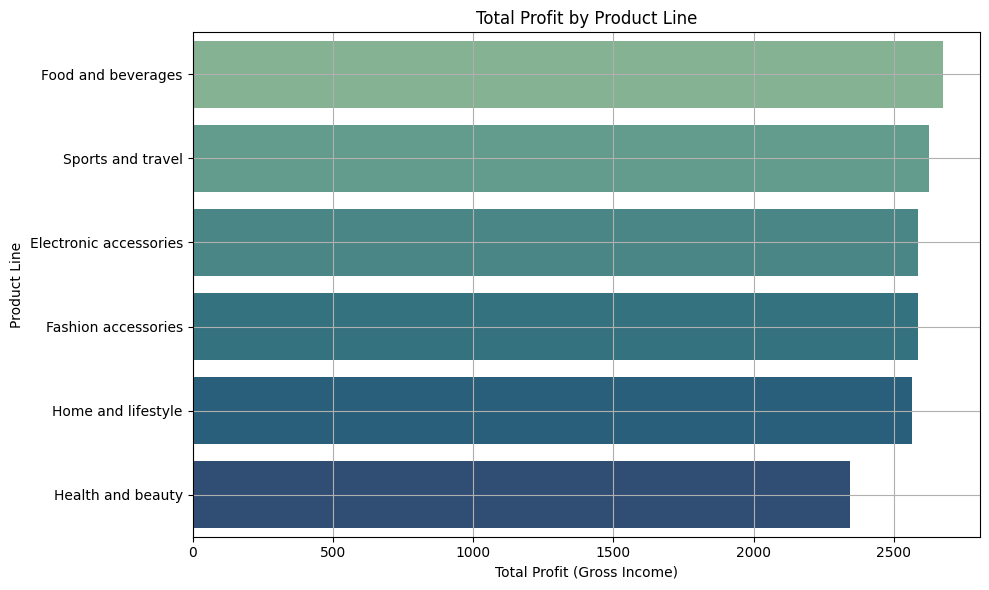

In [ ]:
# Step 9: Total Profit by Product Line
profit_by_product = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False).reset_index()

# Step 10: Plot Profit by Product Line
plt.figure(figsize=(10,6))
sns.barplot(x='gross income', y='Product line', data=profit_by_product, palette='crest')
plt.title("Total Profit by Product Line")
plt.xlabel("Total Profit (Gross Income)")
plt.ylabel("Product Line")
plt.grid(True)
plt.tight_layout()
plt.show()